In [37]:
import matplotlib.pylab as plt

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters
from tsfresh.examples.robot_execution_failures import (
    download_robot_execution_failures,
    load_robot_execution_failures,
)


from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [38]:
download_robot_execution_failures()
timeseries, y = load_robot_execution_failures()

In [39]:
timeseries

,id,time,F_x,F_y,F_z,T_x,T_y,T_z
0,1,0,-1,-1,63,-3,-1,0
1,1,1,0,0,62,-3,-1,0
2,1,2,-1,-1,61,-3,0,0
3,1,3,-1,-1,63,-2,-1,0
4,1,4,-1,-1,63,-3,-1,0
...,...,...,...,...,...,...,...,...
1315,88,10,-10,2,39,-21,-24,5
1316,88,11,-11,2,38,-24,-22,6
1317,88,12,-12,3,23,-24,-24,5
1318,88,13,-13,4,26,-29,-27,5


In [40]:
timeseries["id"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88])

In [41]:
y

1      True
2      True
3      True
4      True
5      True
      ...  
84    False
85    False
86    False
87    False
88    False
Length: 88, dtype: bool

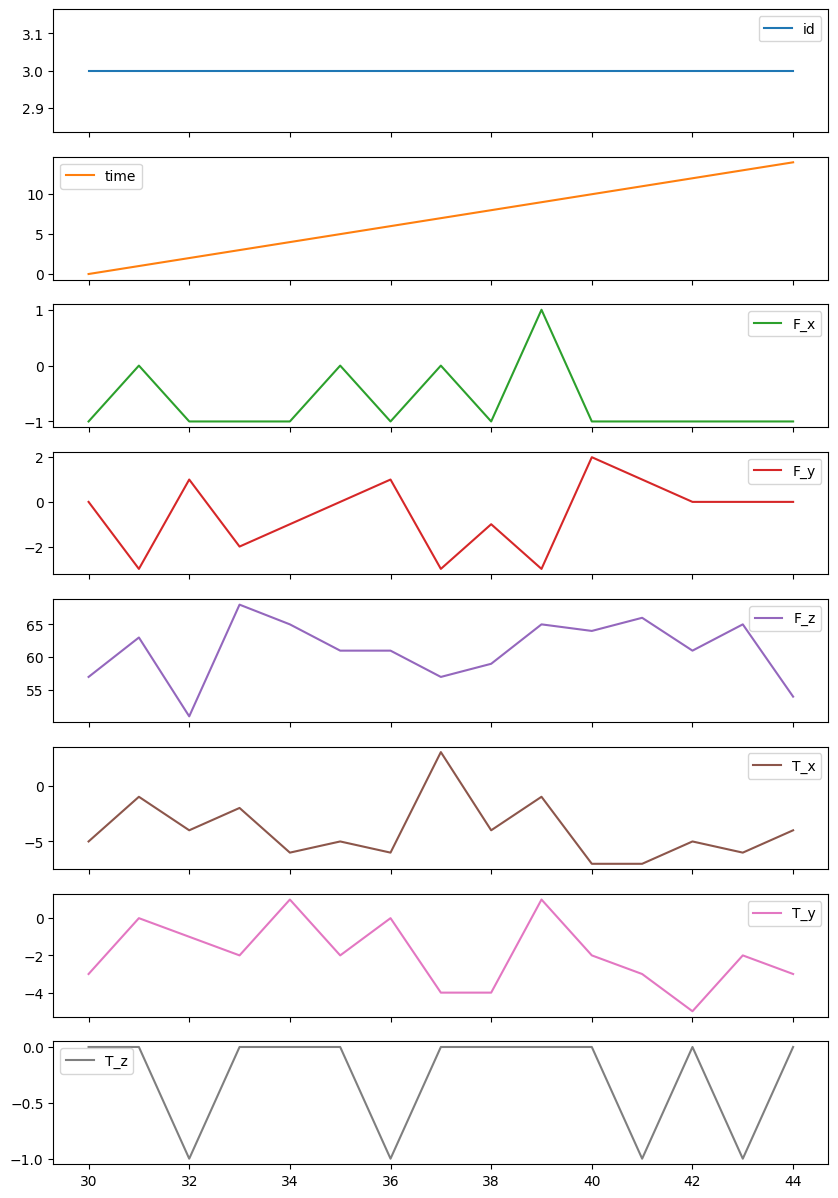

In [42]:
timeseries[timeseries["id"] == 3].plot(subplots=True, sharex=True, figsize=(10, 15))
plt.show()

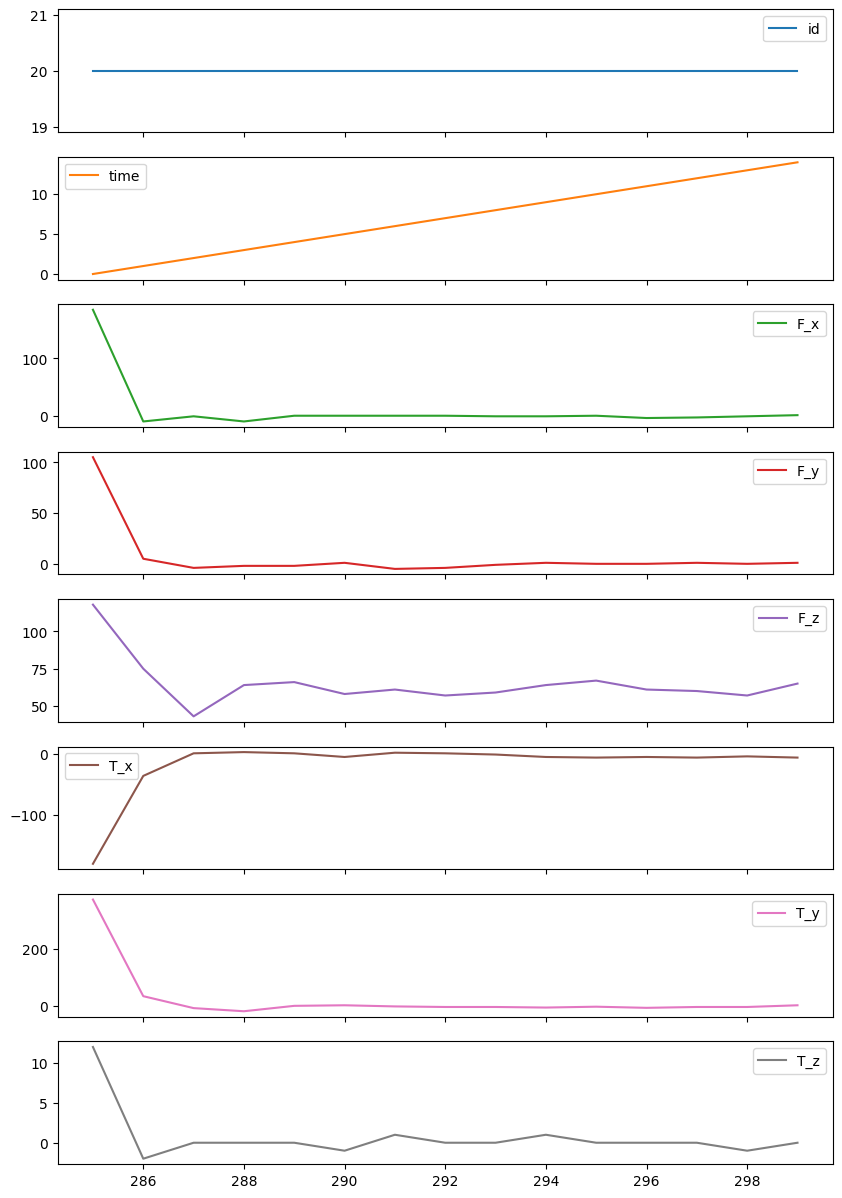

In [43]:
timeseries[timeseries["id"] == 20].plot(subplots=True, sharex=True, figsize=(10, 15))
plt.show()

In [44]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(
    timeseries, y, column_id="id", column_sort="time"
)

Feature Extraction: 100%|██████████| 48/48 [00:07<00:00,  6.71it/s]


In [45]:
features_filtered_direct

,F_x__value_count__value_-1,F_x__root_mean_square,F_x__abs_energy,T_y__absolute_maximum,F_x__mean_n_absolute_max__number_of_maxima_7,F_x__range_count__max_1__min_-1,F_y__root_mean_square,F_y__abs_energy,F_y__mean_n_absolute_max__number_of_maxima_7,T_y__standard_deviation,...,"F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,T_y__lempel_ziv_complexity__bins_3,T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7,F_z__permutation_entropy__dimension_4__tau_1,"T_x__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0"
1,14.0,0.966092,14.0,1.0,1.000000,15.0,0.930949,13.0,1.000000,0.471405,...,0.0,-3.0,1.0,0.400000,-1.0,-5.960000e+02,-1.0,-1.0,1.698783,0.000000
2,7.0,1.290994,25.0,5.0,1.571429,13.0,2.250926,76.0,3.000000,2.054805,...,1.0,-9.2,1.0,0.533333,-3.6,-6.803846e+02,-1.0,-1.0,2.369382,0.000000
3,11.0,0.894427,12.0,5.0,1.000000,14.0,1.632993,40.0,2.142857,1.768867,...,3.0,-6.6,0.0,0.533333,-4.0,-6.170000e+02,-1.0,0.0,2.369382,0.000000
4,5.0,1.032796,16.0,6.0,1.285714,10.0,2.000000,60.0,2.428571,2.669998,...,0.0,-9.0,0.0,0.533333,-4.6,3.426308e+03,-1.0,1.0,1.979205,0.000000
5,9.0,1.064581,17.0,5.0,1.285714,13.0,1.751190,46.0,2.285714,2.039608,...,0.0,-9.6,0.0,0.466667,-5.0,-2.609000e+03,-1.0,0.8,1.979205,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,80.346334,96833.0,167.0,105.285714,0.0,53.404120,42780.0,71.428571,39.541483,...,46.0,203.2,0.0,0.533333,36.4,-7.700628e+07,-105.0,66.8,1.126929,64.000000
85,0.0,10.592450,1683.0,14.0,13.714286,0.0,10.076375,1523.0,12.142857,3.841296,...,4.5,-41.6,0.0,0.466667,1.0,-1.050785e+04,5.8,10.6,1.704551,13.555556
86,0.0,74.608757,83497.0,191.0,98.142857,0.0,37.473546,21064.0,47.714286,52.807154,...,7.0,-84.8,0.0,0.466667,19.6,-5.544922e+06,30.4,38.4,0.566086,0.250000
87,0.0,306.097697,1405437.0,471.0,340.000000,0.0,143.447551,308658.0,157.285714,80.098162,...,90.5,-139.2,0.0,0.466667,272.6,-9.881845e+07,246.8,154.8,1.126929,0.000000


In [46]:
X = features_filtered_direct

In [47]:
X_full_train, X_full_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

In [48]:
X_filtered_train = select_features(X_full_train, y_train)

In [49]:
X_filtered_train, X_filtered_test = X_full_train[X_filtered_train.columns], X_full_test[X_filtered_train.columns]

In [50]:
classifier_full = DecisionTreeClassifier()
classifier_full.fit(X_full_train, y_train)
print(classification_report(y_test, classifier_full.predict(X_full_test)))

              precision    recall  f1-score   support

       False       1.00      0.96      0.98        24
        True       0.92      1.00      0.96        12

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.97      0.97      0.97        36



In [51]:
classifier_filtered = DecisionTreeClassifier()
classifier_filtered.fit(X_filtered_train, y_train)
print(classification_report(y_test, classifier_filtered.predict(X_filtered_test)))

              precision    recall  f1-score   support

       False       0.96      1.00      0.98        24
        True       1.00      0.92      0.96        12

    accuracy                           0.97        36
   macro avg       0.98      0.96      0.97        36
weighted avg       0.97      0.97      0.97        36

